In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
nobel = pd.read_csv(r"C:/Users/Mohit/Task-3 Data Science/nobel_prize_by_winner.csv",parse_dates=True)

In [3]:
nobel.head(n=2)

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA


In [4]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 972 non-null    int64  
 1   firstname          966 non-null    object 
 2   surname            936 non-null    object 
 3   born               946 non-null    object 
 4   died               946 non-null    object 
 5   bornCountry        940 non-null    object 
 6   bornCountryCode    940 non-null    object 
 7   bornCity           938 non-null    object 
 8   diedCountry        601 non-null    object 
 9   diedCountryCode    600 non-null    object 
 10  diedCity           595 non-null    object 
 11  gender             972 non-null    object 
 12  year               966 non-null    float64
 13  category           966 non-null    object 
 14  overallMotivation  16 non-null     object 
 15  share              966 non-null    float64
 16  motivation         878 non

In [5]:
#Display the number of (possibly shared) Nobel Prizes handed out between 1901 and 2016
display(len(nobel['share']))
#Display the number of prizes won by male and female recipients
display(nobel['gender'].value_counts().head(10))
gender=nobel['gender'].value_counts()
#Display the number of prizes won by the top 10 nationalities 
country=nobel['bornCountry'].value_counts().head(10)
country
category=nobel['category'].value_counts()

972

male      896
female     50
org        26
Name: gender, dtype: int64

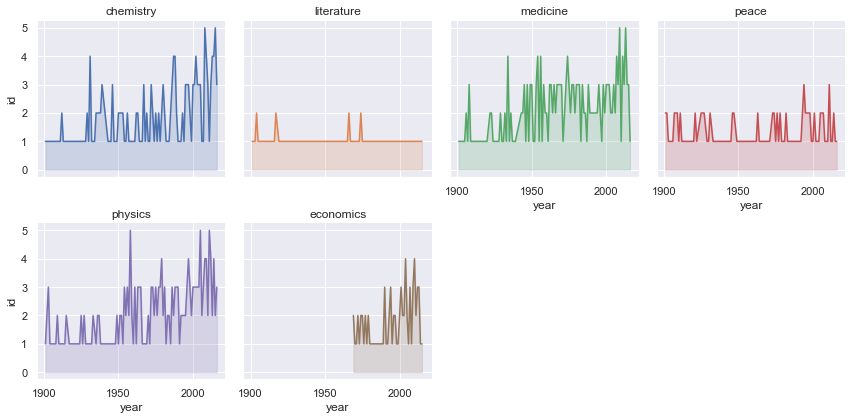

In [6]:
year_cat=nobel.groupby(['year','category'])['id'].count().reset_index()
year_cat
g=sns.FacetGrid(year_cat,col='category',hue='category',col_wrap=4,)
g=g.map(plt.plot,'year','id')
g=g.map(plt.fill_between,'year','id',alpha=0.2).set_titles("{col_name}category")
g=g.set_titles("{col_name}")
plt.show()

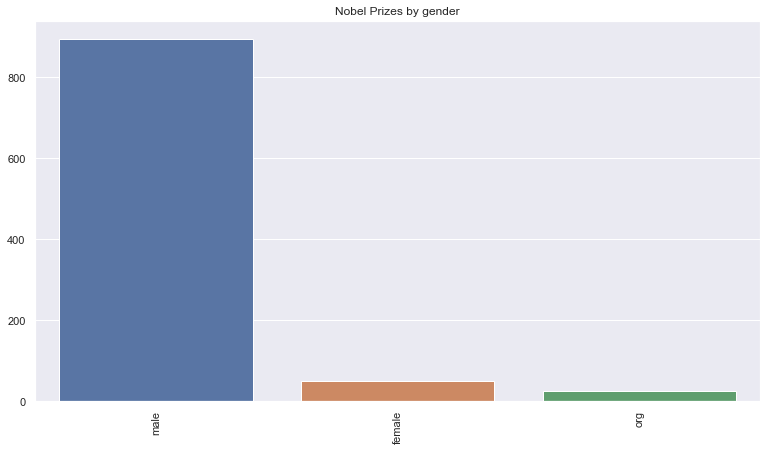

In [7]:
plt.rcParams['figure.figsize']=[13,7]
sns.barplot(x=gender.index,y=gender.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by gender')
plt.show()

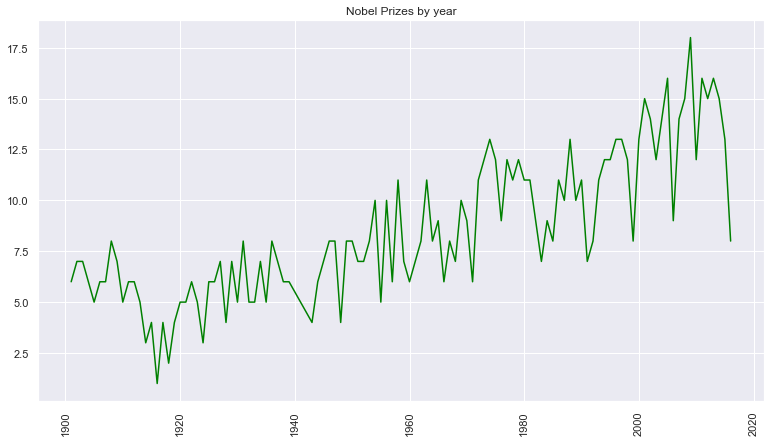

In [8]:
year=nobel['year'].value_counts()
sns.lineplot(x=year.index,y=year.values,color='green')
plt.xticks(rotation=90)
plt.title('Nobel Prizes by year')
plt.show()

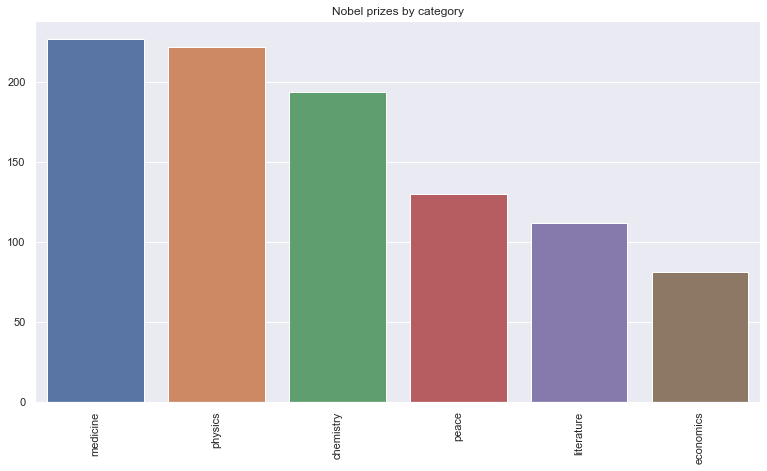

In [9]:
sns.barplot(x=category.index,y=category.values)
plt.xticks(rotation=90)
plt.title('Nobel prizes by category')
plt.show()

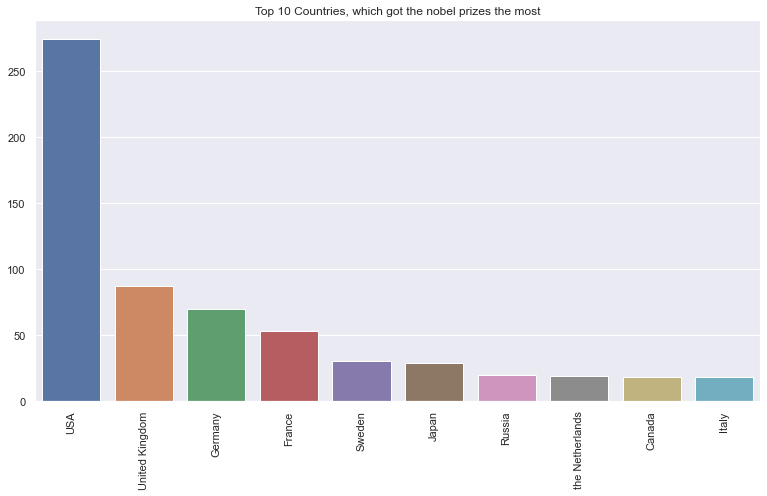

In [10]:
sns.barplot(x=country.index,y=country.values)
plt.xticks(rotation=90)
plt.title('Top 10 Countries, which got the nobel prizes the most')
plt.show()

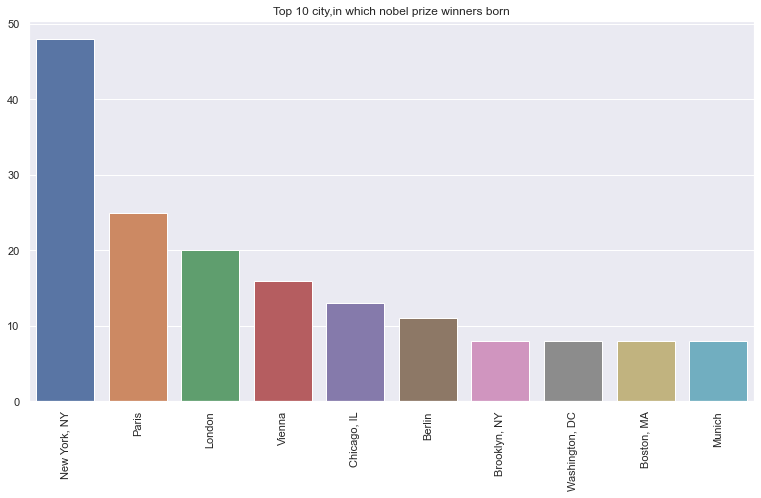

In [11]:
city=nobel['bornCity'].value_counts().head(10)
sns.barplot(x=city.index,y=city.values)
plt.xticks(rotation=90)
plt.title('Top 10 city,in which nobel prize winners born')
plt.show()

In [12]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['bornCountry']=="USA"
nobel = nobel.fillna(0)
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,0,0.000000
1,1900,0.017241
2,1910,0.075000
3,1920,0.074074
4,1930,0.241935
5,1940,0.288889
6,1950,0.278481
7,1960,0.262500
8,1970,0.308411
9,1980,0.313131
